In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# EDA


In [78]:
fraud = pd.read_csv("C:/Users/LENOVO/Downloads/Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [79]:
fraud= fraud.rename({'Marital.Status': 'Marital_Status',
                    'Taxable.Income': 'Taxable_Income',
                    'City.Population': 'City_Population',
                    'Work.Experience': 'Work_Experiense'}, axis=1)

In [80]:
fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experiense,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [81]:
fraud_temp=fraud
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experiense  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [82]:
fraud_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable_Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City_Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work_Experiense,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


***********Taxable_Income********


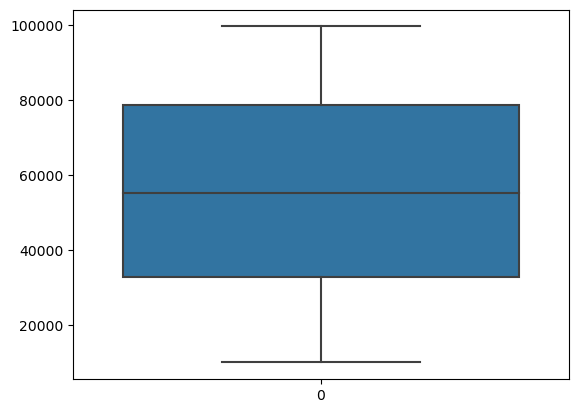

***********City_Population********


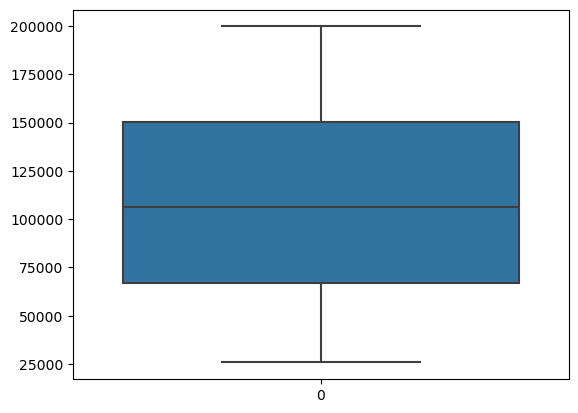

***********Work_Experiense********


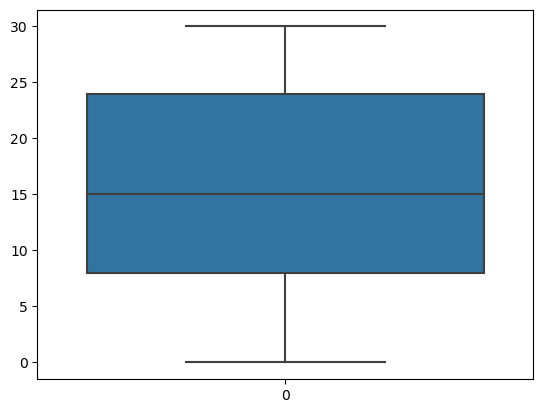

In [83]:
for features in fraud_temp.columns:
    if fraud_temp[features].dtype!='object':
        print("***********{}********".format(features))
        sns.boxplot(fraud_temp[features])
        plt.show()

In [84]:
fraud_temp.shape

(600, 6)

In [85]:
for features in fraud_temp.columns:
    if fraud_temp[features].dtype=='object':
        fraud_temp[features]=pd.Categorical(fraud_temp[features])
        
        fraud_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    category
 1   Marital_Status   600 non-null    object  
 2   Taxable_Income   600 non-null    int64   
 3   City_Population  600 non-null    int64   
 4   Work_Experiense  600 non-null    int64   
 5   Urban            600 non-null    object  
dtypes: category(1), int64(3), object(2)
memory usage: 24.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    category
 1   Marital_Status   600 non-null    category
 2   Taxable_Income   600 non-null    int64   
 3   City_Population  600 non-null    int64   
 4   Work_Experiense  600 non-null    int64   
 5   Urban            6

In [86]:
print(fraud_temp['Undergrad'].value_counts())
print("***********************")
print(fraud_temp['Marital_Status'].value_counts())
print("***********************")

YES    312
NO     288
Name: Undergrad, dtype: int64
***********************
Single      217
Married     194
Divorced    189
Name: Marital_Status, dtype: int64
***********************


## Lets split our data into target and independent variables

In [87]:
y=fraud_temp[['Taxable_Income']]

In [88]:
#risky=1 good=0
y=np.where(y.Taxable_Income>=30000,0,1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [89]:
x=fraud_temp.drop('Taxable_Income', axis=1)
oneHotCols=["Undergrad", "Marital_Status", "Urban"]
x=pd.get_dummies(x,columns=oneHotCols)
x.head()

,City_Population,Work_Experiense,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0


In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [91]:
x_train.shape, x_test.shape

((480, 9), (120, 9))

In [92]:
y_train.shape, y_test.shape

((480,), (120,))

In [93]:
from sklearn.ensemble import RandomForestClassifier

# Define the depth variable
depth = 10  # You can assign the desired value here

for features in range(2, 8):
    model = RandomForestClassifier(n_estimators=100, criterion='gini', bootstrap=True, max_depth=depth, max_features=features)
    model.fit(x_train, y_train)
    print("********feature {}***********".format(features))


********feature 2***********
********feature 3***********
********feature 4***********
********feature 5***********
********feature 6***********
********feature 7***********


In [94]:
for features in range(2,8):
    model=RandomForestClassifier(n_estimators=100,criterion='gini',bootstrap=True,max_depth=depth,max_features=features)
    model.fit(x_train,y_train)
    print("********feature {}***********". format(features))
    print(model.score(x_train,y_train)*100)
    print(model.score(x_test,y_test)*100)

********feature 2***********
98.33333333333333
74.16666666666667
********feature 3***********
98.125
75.83333333333333
********feature 4***********
96.45833333333333
75.83333333333333
********feature 5***********
96.25
75.0
********feature 6***********
95.83333333333334
75.83333333333333
********feature 7***********
96.04166666666667
75.83333333333333


In [95]:
for features in range(2,8):
    model=RandomForestClassifier(n_estimators=400,criterion='gini',bootstrap=True,max_depth=depth,max_features=features)
    model.fit(x_train,y_train)
    print("********feature {}***********". format(features))
    print(model.score(x_train,y_train)*100)
    print(model.score(x_test,y_test)*100)

********feature 2***********
98.95833333333334
75.83333333333333
********feature 3***********
98.75
75.83333333333333
********feature 4***********
97.91666666666666
75.83333333333333
********feature 5***********
96.04166666666667
76.66666666666667
********feature 6***********
97.70833333333333
77.5
********feature 7***********
95.625
77.5


In [96]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming you have x and y data

num_tree = 100
max_feature = 11

# Create a KFold cross-validation iterator
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Initialize an empty list to store cross-validation results
results = []

for i in range(2, 8):
    model = RandomForestClassifier(n_estimators=num_tree, max_depth=3, max_features=i)
    
    # Perform cross-validation and calculate scores
    scores = cross_val_score(model, x, y, cv=kfold)
    
    results.append(scores)

# Now 'results' contains the scores for different max_features
for idx, scores in enumerate(results, start=2):
    print("Max Features:", idx)
    print("Cross-validation scores:", scores)
    print("Mean CV score:", scores.mean())
    print()


Max Features: 2
Cross-validation scores: [0.78333333 0.73333333 0.86666667 0.91666667 0.75       0.76666667
 0.83333333 0.66666667 0.83333333 0.78333333]
Mean CV score: 0.7933333333333332

Max Features: 3
Cross-validation scores: [0.78333333 0.73333333 0.86666667 0.91666667 0.75       0.76666667
 0.83333333 0.66666667 0.83333333 0.78333333]
Mean CV score: 0.7933333333333332

Max Features: 4
Cross-validation scores: [0.78333333 0.73333333 0.86666667 0.91666667 0.75       0.76666667
 0.83333333 0.66666667 0.83333333 0.78333333]
Mean CV score: 0.7933333333333332

Max Features: 5
Cross-validation scores: [0.78333333 0.73333333 0.86666667 0.91666667 0.75       0.76666667
 0.83333333 0.66666667 0.83333333 0.78333333]
Mean CV score: 0.7933333333333332

Max Features: 6
Cross-validation scores: [0.78333333 0.73333333 0.86666667 0.91666667 0.75       0.76666667
 0.83333333 0.66666667 0.83333333 0.78333333]
Mean CV score: 0.7933333333333332

Max Features: 7
Cross-validation scores: [0.78333333 0.

In [98]:
num_tree
list=[]
for i in range (2,8):
    max_feature=11
    kfold=KFold(n_splits=10,random_state=7,shuffle=True)
    model=RandomForestClassifier(n_estimators=num_tree, max_depth=3,max_features=i)
    result=cross_val_score(model,x,y,cv=kfold)
    list.append(result.mean()*100)

In [99]:
(sum(list)/len(list))

79.33333333333333